In [1]:
import numpy as np

from matplotlib import pyplot as plt

In [2]:
from zenbu import Zenbu

In [3]:
k, p = np.loadtxt("Pk_Planck15_Table4.txt", unpack=True)
zen  = Zenbu(k, 0.5*p, jn = 15)
zen.make_ptable(kmin=3e-3, kmax = 1.0)

In [4]:
# Let's explicitly list the components
# Note that the cross spectra are multiplied by a factor of one half.

kv = zen.pktable[:,0]

spectra = {\
          r'$(1,1)$':zen.pktable[:,1],\
          r'$(1,b_1)$':zen.pktable[:,2], r'$(b_1,b_1)$': zen.pktable[:,3],\
          r'$(1,b_2)$':zen.pktable[:,4], r'$(b_1,b_2)$': zen.pktable[:,5],  r'$(b_2,b_2)$': zen.pktable[:,6],\
          r'$(1,b_s)$':zen.pktable[:,7], r'$(b_1,b_s)$': zen.pktable[:,8],  r'$(b_2,b_s)$': zen.pktable[:,9], r'$(b_s,b_s)$':zen.pktable[:,10],\
          }

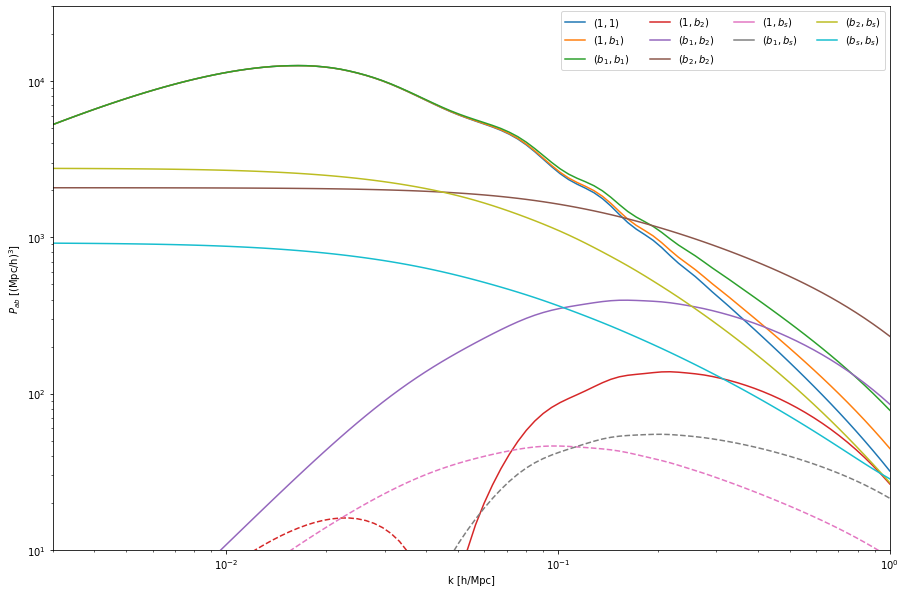

In [5]:
# Plot some stuffs
plt.figure(figsize=(15,10))

spec_names = spectra.keys()

for ii, spec_name in enumerate(spec_names):    
    plt.loglog(kv, spectra[spec_name],'C'+str(ii), label=spec_name)
    plt.loglog(kv, -spectra[spec_name],'C'+str(ii)+'--')

plt.xlim(3e-3, 1)    
plt.ylim(10,3e4)
plt.legend(ncol=4)
plt.xlabel('k [h/Mpc]')
plt.ylabel(r'$P_{ab}$ [(Mpc/h)$^3$]')  
plt.show()

In [6]:
# Compare to velocileptors:
import sys
sys.path.append('/global/homes/s/sfschen/Python/velocileptors/')
from velocileptors.LPT.cleft_fftw import CLEFT

In [7]:
cleft  = CLEFT(k, 0.5*p, jn = 15, one_loop=False)
cleft.make_ptable(kmin=3e-3, kmax = 1.0)

In [8]:
cleft_spectra = {\
          r'$(1,1)$':cleft.pktable[:,1],\
          r'$(1,b_1)$':0.5*cleft.pktable[:,2], r'$(b_1,b_1)$': cleft.pktable[:,3],\
          r'$(1,b_2)$':0.5*cleft.pktable[:,4], r'$(b_1,b_2)$': 0.5*cleft.pktable[:,5],  r'$(b_2,b_2)$': cleft.pktable[:,6],\
          r'$(1,b_s)$':0.5*cleft.pktable[:,7], r'$(b_1,b_s)$': 0.5*cleft.pktable[:,8],  r'$(b_2,b_s)$':0.5*cleft.pktable[:,9], r'$(b_s,b_s)$':cleft.pktable[:,10],\
         }

Text(0, 0.5, '$(b_1,b_2)$')

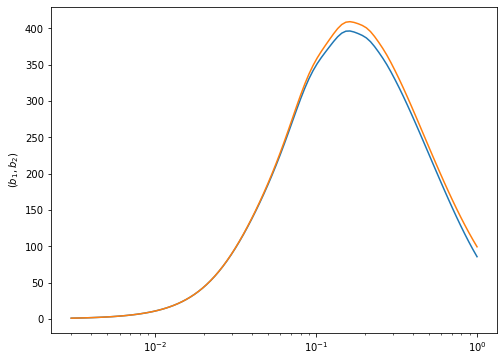

In [9]:
plt.figure(figsize=(8,6))

plt.semilogx(kv,  (spectra[r'$(b_1,b_2)$']))
plt.semilogx(kv,  (2*cleft_spectra[r'$(b_1,b_2)$']))

plt.ylabel(r'$(b_1,b_2)$')

Text(0, 0.5, '$(b_1,b_s)$')

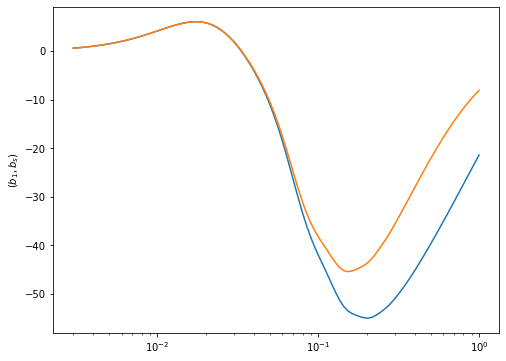

In [10]:
plt.figure(figsize=(8,6))


plt.semilogx(kv, (spectra[r'$(b_1,b_s)$']))
plt.semilogx(kv, (cleft_spectra[r'$(b_1,b_s)$']))

plt.ylabel(r'$(b_1,b_s)$')

Text(0, 0.5, '$(b_s,b_s)$')

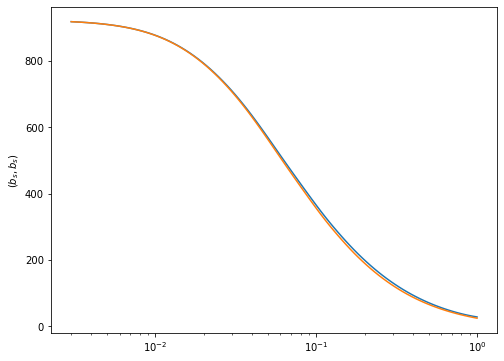

In [11]:
plt.figure(figsize=(8,6))


plt.semilogx(kv, (spectra[r'$(b_s,b_s)$']))
plt.semilogx(kv, (cleft_spectra[r'$(b_s,b_s)$']))

plt.ylabel(r'$(b_s,b_s)$')